In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("train.csv") 

In [10]:
data

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,1,16,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,1,25,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
3,1,35,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
4,1,45,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
5,1,55,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
6,2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016000
7,2,6,2,26.5,22.5,25.5,31.5,26.5,26.5,28.5,...,1.005000,0.0625,-0.1875,0.2500,0.6875,NaN,NaN,NaN,1.409988,1.016000
8,2,11,2,21.5,15.5,20.5,25.0,26.5,23.5,25.0,...,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,NaN,-0.350006,1.759994,1.016000
9,2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016000


In [3]:
# Report missing value of each column
# id column - unique number for set of observation over an hour at a gauge
data_id = data['Id']
#total count of id columns
totalCount = len(data_id)
#Number of non-null id
nonNull = data_id.count().transpose()
#Number of null id
isNull = data_id.isnull().sum()
#NUmber of unique values
totalUnique = data_id.nunique()
print "#### ID COLUMN STATS ####"
print "totalCount = " + str(totalCount)
print "nonNull = " + str(nonNull)
print "isNull = " + str(isNull)
print "totalUnique = " + str(totalUnique)



#### ID COLUMN STATS ####
totalCount = 13765201
nonNull = 13765201
isNull = 0
totalUnique = 1180945


In [4]:
# For the id cound do group by and count to get number of radar scans per hour
numberOfRadarScans = data[['Id','Expected']].groupby(['Id']).agg(['mean', 'count'])

In [5]:
numberOfRadarScans.reset_index(inplace=True)

In [6]:
rainNumberOfScans = numberOfRadarScans['Expected'][['mean','count']]

In [22]:
rainNumberOfScans.columns = ['rainfall','number_of_scans']

In [24]:
meanRainNumberOfScans = rainNumberOfScans[['number_of_scans','rainfall']].groupby(['number_of_scans']).agg(['mean'])

In [25]:
meanRainNumberOfScans

,rainfall
,mean
number_of_scans,
1,533.026691
2,213.820918
3,222.172080
4,396.290694
5,279.463200
6,374.048925
7,357.582107
8,196.802302


In [28]:
meanRainNumberOfScans.reset_index(inplace=True)

In [42]:
meanRainNumberOfScans = pd.concat([meanRainNumberOfScans['number_of_scans'] ,meanRainNumberOfScans['rainfall']['mean']],axis =1)

In [53]:
meanRainNumberOfScans.columns = ['number_of_scans','mean_rainfall']

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

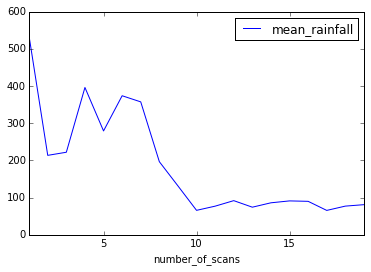

In [55]:
meanRainNumberOfScans.plot(x='number_of_scans', y='mean_rainfall')